# Single systems

![Illustration of a notebook and an atom.](images/single-systems-hero.png)

This lesson introduces the framework of [quantum](gloss:quantum) information, including:
- how we can describe quantum states as vectors,
- how measurements extract classical information from these quantum states, and
- how unitary matrices can represent quantum operations.

To keep things simple, we'll only consider single systems in isolation. In the next lesson we'll look at multiple systems, and correlations among systems (such as entanglement).

There are two common mathematical descriptions of quantum information; we'll start with the simpler of the two as it's enough to describe most quantum algorithms, and is a natural place to start pedagogically.

Eventually, we'll need to cover _density matrices_ to study more complicated aspects of quantum information. E.g.: to model the effects of [noise](gloss:noise) on quantum computations, and as a mathematical basis for quantum information theory and quantum cryptography (it's also quite beautiful from a mathematical perspective!)

For these reasons, we encourage you to learn more about it when the time is right, but for now our focus will be on the simpler description of quantum information.

## 1. Classical information <a id='single-systems-classical'></a>

![Illustration of dice, a DNA helix, and coins.](images/classical-information-hero.png)

To describe quantum information and how it works, we'll begin with a discussion of *classical* information.

You might wonder why we're devoting so much attention to classical information in these early lessons, so we'll quickly explain.

For one, although quantum and classical information are different in some pretty spectacular ways, their mathematical descriptions are actually quite similar. Classical information serves as a familiar point of reference when studying quantum information, as well as a source of analogy that goes a surprisingly long way.
For instance, people often ask questions about quantum information that have natural classical analogs — and often obvious answers to the classical analogs provide a great deal of clarity and insight into the original questions.

Indeed, you could claim that one cannot truly understand quantum information without understanding classical information.

Some readers may already be familiar with the material in this section, while others may not — but the discussion is meant for both audiences. In addition to highlighting the most relevant aspects of classical information, this section introduces *Dirac notation*, which we use throughout this textbook and is standard in the quantum information and computation community.

Dirac notation isn't necessarily specific to quantum information; we can also use it for most things involving vectors and matrices, including classical information.

### 1.1 Classical states and probability vectors <a id='classical-states'></a>

Suppose that we have a [system](gloss:system) that stores information. Specifically, we'll assume that this system can be in one [*classical state*](gloss:classical-state) at each instant.

The simplest possible system is the bit, a system whose classical states are 0 and 1. This is the archetypal example, and we'll come back to it repeatedly. Other examples include:
- a standard six-sided die, whose classical states are 1, 2, 3, 4, 5, and 6
- a nucleobase in a strand of DNA, whose classical states are *A*, *C*, *G*, and *T*, and
- a switch on an electric fan, whose classical states are (commonly) *high*, *medium*, *low*, and *off*.

We usually look at systems in the world around us and identify their different states to help create a mental model of how they work. Mathematically, however, specifying a system's classical states is the starting point: we _define_ a bit to be a system that has classical states 0 and 1, and likewise for systems with different classical state sets.

In this discussion, we'll use '$\mathsf{X}$' to refer the system we're considering, and use '$\class{_sigma}{\Sigma}$' to refer to the set of classical states of $\mathsf{X}$. For simplicity, we'll assume $\Sigma$ is finite; while it can be sensible to consider physical systems with an infinite number of classical states, we'll ignore this for now. We'll also assume that $\Sigma$ is nonempty, as it's nonsensical for a physical system to have no states at all. From now on, we'll use *classical state set* to mean *a finite and nonempty set*.

For example:
- If $\mathsf{X}$ is a bit, then $\class{_sigma}{\Sigma} = \class{_set_brackets}{{\{0,1\}}}$,
- if $\mathsf{X}$ is a six-sided die, then $\Sigma = \{1, 2, 3, 4, 5, 6\}$, and
- if $\mathsf{X}$ is an electric fan switch, then $\Sigma = \{\mathrm{high},\mathrm{medium},\mathrm{low},\mathrm{off}\}$.

When thinking about $\mathsf{X}$ as a carrier of information, it may be sufficient to describe $\mathsf{X}$ as simply being in one classical state. For instance, if $\mathsf{X}$ is a fan switch, we might happen to know with certainty that it's set to *high*.

Often in information processing, however, our knowledge of $\mathsf{X}$ is uncertain, and we represent our knowledge of the classical state of $\mathsf{X}$ by assigning probabilities to each classical state, resulting in a *probabilistic state*.

For example, suppose $\mathsf{X}$ is a bit. Based on what we know or guess has happened to $\mathsf{X}$ in the past, we might believe that $\mathsf{X}$ has a 3/4 chance of being in the classical state 0, and a 1/4 chance of being the state 1. We can represent this belief by writing:

$$
\class{probability}{\operatorname{Pr}}(\mathsf{X}=0) = \frac{3}{4}
\quad\text{and}\quad
\class{probability}{\operatorname{Pr}}(\mathsf{X}=1) = \frac{1}{4}.
$$

A more succinct way to represent this probabilistic state is as a column vector, where we throw away the labels and just write down the probabilities:

$$
\begin{pmatrix}
  \frac{3}{4}\\[1mm]
  \frac{1}{4}
\end{pmatrix}.
$$

We've placed the probability of 0 at the top of the vector, and of 1 at the bottom. It's convention to order the probabilities by the value of their corresponding state if they have an obvious order, otherwise the order needs specifying clearly. This notation is not just succinct; identifying probabilistic states as column vectors means we can use matrix–vector multiplication to represent operations on these probabilistic states. We'll discuss this in greater detail shortly.

We can represent any probabilistic state through a column vector, where:

1. All entries of the vector are *nonnegative real numbers*.
2. The sum of the entries is equal to 1.

And similarly, any column vector that satisfies these conditions represents a possible probabilistic state. We'll call vectors of this type *probability vectors*.

<!-- ::: q-block.exercise -->

### Code exercise

Drag the lines of Python code to create a function, `is_probability_vector`, that takes a list of numbers and returns `True` if the elements of that list form a probability vector.

    q-drag-and-drop-code
        .line def is_probability_vector(vector):
            .line total = 0
            .line for entry in vector:
                .line if entry < 0:
                    .line return False
                .line total += entry
            .line if total != 1:
                .line return False
            .line return True
        .result-info.md Return `True` if `vector` satisfies probability vector conditions.

<!-- ::: -->

### 1.2 Measuring classical states <a id='classical-measure'></a>

Now let's briefly consider what happens if we *measure* a system when it's in a probabilistic state.
By measuring a system, we mean that we unambiguously recognize whatever classical state the system is in.

Measurement changes our knowledge of a system, and therefore changes the probabilistic state we use to describe it. For example, if we learn $\mathsf{X}$ is in the classical state $a\in\Sigma$, then the new probability vector representing our knowledge of $\mathsf{X}$ has a 1 in the entry corresponding to $a$, and 0 in all other entries.
This new vector tells us $\mathsf{X}$ is in the classical state $a$ with certainty, as we just discovered through our measurement.

We call this vector (that has a 1 in the entry corresponding to $a$ and 0 for all other entries), $\vert a\rangle$, pronounced "ket $a$" for a reason we'll explain later. Vectors of this sort are called *standard basis* elements.

For example, if our system is a bit, whose classical state set is $\{0,1\}$, we denote

$$
  \vert 0\rangle = \begin{pmatrix}1\\0\end{pmatrix}
  \quad\text{and}\quad
  \vert 1\rangle = \begin{pmatrix}0\\1\end{pmatrix}.
$$

Notice that any two-dimensional column vector can be expressed as a linear combination of these two vectors.
For example, we have

$$
\begin{pmatrix}
  \frac{3}{4}\\[2mm]
  \frac{1}{4}
\end{pmatrix}
= \frac{3}{4}\,\vert 0\rangle + \frac{1}{4}\,\vert 1\rangle.
$$

More generally, we can write any column vector as a linear combination of standard basis elements, and we'll do this a lot going forward.

Returning to how measurement changes probabilistic states, we may note the following connection to our everyday experiences.
Suppose we flip a fair coin, but cover up the coin before looking at it. We'd say its probabilistic state is

$$
\begin{pmatrix}
  \frac{1}{2}\\[2mm]
  \frac{1}{2}
\end{pmatrix}
= \frac{1}{2}\,\vert\text{heads}\rangle + \frac{1}{2}\,\vert\text{tails}\rangle.
$$

Here, the classical state set of our coin is $\{\text{heads},\text{tails}\}$, and even though it doesn't matter for this particular vector, we'll order these two states as heads first, tails second:

$$
\vert\text{heads}\rangle = \begin{pmatrix}1\\0\end{pmatrix}
\quad\text{and}\quad
\vert\text{tails}\rangle = \begin{pmatrix}0\\1\end{pmatrix}.
$$

If we uncovered the coin and looked at it, we'd see one of these two classical states.
Supposing that the result were tails, we'd naturally update our description of the probabilistic state of the coin to be $|\text{tails}\rangle$. Of course, if we were then to cover the coin, uncover it, and look at it again, the classical state would obviously still be tails, which matches our mathematical description. This may seem trivial, and in some sense it is — but in recognizing this triviality, the analogous behavior for quantum information might seem less unusual.

It's important to remember that probabilistic states describe knowledge or belief, and not necessarily something actual.

The state of our coin after we flip it (but before we look) _is_ either heads or tails, we simply do not know which. Looking at the coin does not change the state of the coin, only our knowledge of it. If we see the classical state of the coin is tails, we'd naturally update our knowledge by assigning the probabilistic state $|\text{tails}\rangle$ to the coin. To anyone who couldn't see the coin being uncovered, the probabilistic state of the coin would remain unchanged and would be described by the old probability vector. This is not a cause for concern: different individuals may have different knowledge or beliefs about of a particular system, and hence describe that system by different probability vectors.

### 1.3 Classical operations <a id='classical-operations'></a>

Finally, in this brief summary of classical information, we'll consider the sorts of operations one might perform on a classical system.

#### Deterministic operations

First, there are [deterministic](gloss:deterministic) operations, which transform each classical state $a\in\Sigma$ to $f(a)$ for some function $f$ of the form $f:\Sigma\rightarrow\Sigma$.

For example, if $\Sigma = \{0,1\}$, there are four functions of this form, $f_1$, $f_2$, $f_3$, and $f_4$, which we can represent using tables:

$$
\rule[-10mm]{0mm}{15mm}
\begin{array}{c|c}
  a & f_1(a)\\
  \hline
  0 & 0\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_2(a)\\
  \hline
  0 & 0\\
  1 & 1
\end{array}
\qquad
\begin{array}{c|c}
  a & f_3(a)\\
  \hline
  0 & 1\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_4(a)\\
  \hline
  0 & 1\\
  1 & 1
\end{array}
$$

The first and last of these functions are *constant*: $f_1(a) = 0$ and $f_4(a) = 1$ for all $a\in\Sigma$.
The middle two are not constant, they are *balanced* which means the two possible output values appear the same number of times in the output column.
The function $f_2$ is the [identity function](gloss:identity-function): $f_2(a) = a$ for each $a\in\Sigma$.
And $f_3$ is the function $f_3(0) = 1$ and $f_3(1) = 0$, which is better-known as the NOT function.

The action of deterministic operations on probabilistic states can be represented by matrix-vector multiplication.
Specifically, the matrix $M$ that represents a given function $f:\Sigma\rightarrow\Sigma$ is the one that satisfies

$$
M \vert a \rangle = \vert f(a)\rangle
$$

for every $a\in\Sigma$.
Such a matrix always exists and is unique.

For example, the matrices $M_1,\ldots,M_4$ corresponding to the functions $f_1,\ldots,f_4$ above are as follows:

$$
  \rule[-6mm]{0mm}{14.5mm}
  M_1 =
  \begin{pmatrix}
    \class{_m00}{1} & \class{_m10}{1}\\
    \class{_m01}{0} & \class{_m11}{0}
  \end{pmatrix},
  \hspace{4mm}
  M_2 =
  \begin{pmatrix}
    \class{_m00}{1} & \class{_m10}{0}\\
    \class{_m01}{0} & \class{_m11}{1}
  \end{pmatrix},
  \hspace{4mm}
  M_3 =
  \begin{pmatrix}
    \class{_m00}{0} & \class{_m10}{1}\\
    \class{_m01}{1} & \class{_m11}{0}
  \end{pmatrix},
  \hspace{4mm}
  \text{and}
  \hspace{4mm}
  M_4 =
  \begin{pmatrix}
    \class{_m00}{0} & \class{_m10}{0}\\
    \class{_m01}{1} & \class{_m11}{1}
  \end{pmatrix}.
$$

Here, and in general, all matrices that represent deterministic operations will have exactly one 1 in each column, and 0 for all other entries.

Similarly to column vectors, we can extend the $|\rangle$ notation to create a convenient way to represent these matrices. We'll use $\langle a \vert$ to represent a *row* vector which has a 1 in the entry corresponding to $a$ and zero for all other entries (for each $a\in\Sigma$). We pronounce this vector as "bra $a$." For example, if $\Sigma = \{0,1\}$, then

$$
  \langle 0 \vert = \begin{pmatrix}
    1 & 0
  \end{pmatrix}
  \quad\text{and}\quad
  \langle 1 \vert = \begin{pmatrix}
    0 & 1
  \end{pmatrix}.
$$

For any classical state set $\Sigma$, we can do the matrix multiplication $| b\rangle \langle a |$, to create a square matrix with just one '1', and all other entries '0'. The '1' will be in the entry corresponding to the pair $(b,a)$, i.e. the row corresponding to $b$, and the column corresponding to $a$. A product of this form, where we have a column vector on the left and a row vector on the right, is sometimes referred to as an *outer product*.

This notation provides a convenient tool for representing matrices. In particular, for any function $f:\Sigma\rightarrow\Sigma$, we can write the matrix $M$ corresponding to the function $f$ as 

$$
  M = \sum_{a\in\Sigma} \vert f(a) \rangle \langle a \vert.
$$

Notice that this expression is consistent with the fact that the multiplication $\langle a | | b \rangle$ (written as $\langle a | b\rangle$ for tidiness), satisfies

$$
  \langle a | b \rangle
  = \begin{cases}
    1 & a = b\\
    0 & a \not= b.
  \end{cases}
$$

To be clear, the multiplication $\langle a | b \rangle$ again refers to ordinary matrix multiplication.
This time, however, because the row vector is on the left and the column vector is on the right, the multiplication results in a $1\times 1$ matrix, which we can view as a scalar.

Using the observation above together with the fact that matrix multiplication is associative and linear, we find

$$
  M \vert b \rangle = 
  \Biggl(
  \sum_{a\in\Sigma} \vert f(a) \rangle \langle a \vert
  \Biggr)
  \vert b\rangle
  = \sum_{a\in\Sigma} \vert f(a) \rangle \langle a \vert b \rangle
  = \vert f(b)\rangle,
$$

for each $b\in\Sigma$, which is what we require of $M$.

The names "bra" and "ket" are perhaps now evident: putting a "bra" $\langle a\vert$ together with a "ket" $\vert b\rangle$ yields a "bracket" $\langle a \vert b\rangle$. This notation and terminology was invented by [Paul Dirac](gloss:dirac), and for this reason is known as the *Dirac notation*.


#### Probabilistic operations and stochastic matrices

Not all operations are deterministic, they can also be *probabilistic*.

For example, consider an operation on a bit where

- if the bit is 0, it's left alone, and
- if the bit is 1, it's flipped to 0 with probability $1/2$.

We can write this as the matrix

$$
  \begin{pmatrix}
    1 & \frac{1}{2}\\[1mm]
    0 & \frac{1}{2}
  \end{pmatrix},
$$

meaning that the action of this operation on a given probabilistic state is obtained by multiplying this matrix to the probability vector associated with the given probabilistic state.

We can calculate the result of this operation on a probability vector by multiplying that vector by this matrix.

$$
  \begin{pmatrix}
    1 & \frac{1}{2}\\[1mm]
    0 & \frac{1}{2}
  \end{pmatrix}
  \begin{pmatrix}
    a \\ b
  \end{pmatrix}
  =
  \begin{pmatrix}
    a + b/2 \\ b/2
  \end{pmatrix}
$$

We can think of probabilistic operations as operations where randomness might somehow be used or introduced during the operation, just like in the example above. 

For any classical state set, we can describe any probabilistic operation in mathematical terms as a [stochastic matrices](gloss:stochastic-matrix). These matrices satisfy two properties:

1. All entries are nonnegative real numbers.
2. The entries in every column sum to 1.

Equivalently, stochastic matrices are matrices whose columns all form probability vectors.

Stochastic matrices always map probability vectors to probability vectors (and any matrix that always maps probability vectors to probability vectors must be a stochastic matrix). In the stochastic matrix description of an operation, each column is the probability vector we'd get when the operation acts on a different classical state.

Finally, another way to think about probabilistic operations is as random choices of deterministic operations.
For instance, we can think about the operation in the example above as applying either the identity function or the constant 0 function, each with probability $1/2$. I.e.:

$$ M =
  \begin{pmatrix}
    1 & \frac{1}{2}\\[1mm]
    0 & \frac{1}{2}
  \end{pmatrix}
  = \frac{1}{2}
  \begin{pmatrix}
    1 & 0\\[1mm]
    0 & 1
  \end{pmatrix}
  + \frac{1}{2}
  \begin{pmatrix}
    1 & 1\\[1mm]
    0 & 0
  \end{pmatrix}.
$$

Such an expression is always possible for any classical state set, and for any stochastic matrix that acts on that state set.

#### Compositions of probabilistic operations

Suppose that $\mathsf{X}$ is a system having classical state set $\Sigma$, and $M_1,\ldots,M_n$ are stochastic matrices representing probabilistic operations $\mathsf{X}$.

If we first apply operation $M_1$ to $u$, the result will be the vector $M_1 u$ (i.e. $M_1$ multiplied by $u$).

If we then apply $M_2$ to this new probability vector ($M_1 u$), we get yet another probability vector

$$
  M_2 (M_1 u) = (M_2 M_1) u.
$$

We can move the parentheses around because matrix multiplication (which includes matrix-vector multiplication as a special case) is [associative](gloss:associative).
We can view the [composition](gloss:composing) of $M_1$ and $M_2$ (where we apply $M_1$ first, and then $M_2$), as a new operation represented by the stochastic matrix $M_2 M_1$.

And more generally, we can write any sequence of operations $M_1,\ldots,M_n$ (meaning that $M_1$ is applied first, $M_2$ is applied second, and so on, with $M_n$ applied last) as the matrix

$$
  M_n \,\cdots\, M_1.
$$

Note that the ordering is important here: although matrix multiplication is associative, it's not a [commutative](gloss:commutative) operation in general. For example, if we have

$$
  M_1 = 
  \begin{pmatrix}
    1 & \frac{1}{2}\\[1mm]
    0 & \frac{1}{2}
  \end{pmatrix}
  \quad\text{and}\quad
  M_2 =
  \begin{pmatrix}
    0 & 1\\[1mm]
    1 & 0
  \end{pmatrix},
$$

then

$$
  M_2 M_1 = 
  \begin{pmatrix}
    0 & \frac{1}{2}\\[1mm]
    1 & \frac{1}{2}
  \end{pmatrix}
  \quad\text{and}\quad
  M_1 M_2 =
  \begin{pmatrix}
    \frac{1}{2} & 1\\[1mm]
    \frac{1}{2} & 0
  \end{pmatrix}.
$$

The order in which we apply probabilistic operations matters, as changing the order can change the resulting operation.

## 2. Quantum information <a id='single-systems-quantum'></a>

![Illustration of a deck of cards.](images/quantum-information-hero.png)

Now we move on to quantum information, where we make a different choice for the type of vector that represents a state — in this case a *quantum state* — of the system being considered.
As in the previous section, we'll be concerned with systems whose classical state sets are finite and nonempty, and we'll use the notation introduced in that section.

### 2.1 Quantum state vectors <a id='single-systems-quantum-states'></a>

As we did with probabilistic states, we represent the *quantum state* of a system $\mathsf{X}$ as a column vector, with the indices ordered in correspondence with the classical state set $\Sigma$ of that system. Vectors representing quantum states have must have two properties:

1. The entries are *complex numbers*.
2. The sum of the *absolute values squared* of the entries must equal 1.

You might notice similarities to the properties of probability vectors. The difference is that the entries no longer need to be non-negative real numbers, and it's the sum of the absolute values squared of the entries (as opposed to just the sum of the entries) that must equal 1.

For a column vector

$$
  v = \begin{pmatrix}
    \alpha_1\\
    \vdots\\
    \alpha_n
  \end{pmatrix}
$$

we define the *Euclidean norm* as:

$$
  \| v \| = \sqrt{\sum_{k=1}^n |\alpha_k|^2}.
$$

So instead of saying "the sum of the absolute values squared of a quantum state vector equals 1", we could say "the vector's Euclidean norm is 1". That is, quantum state vectors are *unit vectors* with respect to the Euclidean norm.


#### Examples of qubit states

A *qubit* is a system with classical states $\{0,1\}$ that can be in a quantum state. A qubit is really just a bit — but by using this name we explicitly recognize that this bit can be in a quantum state. Here are examples of quantum states of a qubit:

$$
  \begin{pmatrix}
    1\\[2mm]
    0
  \end{pmatrix}
  = \vert 0\rangle
  \quad\text{and}\quad
  \begin{pmatrix}
    0\\[2mm]
    1
  \end{pmatrix}
  = \vert 1\rangle,
$$

$$  
  \begin{pmatrix}
    \frac{1}{\sqrt{2}}\\[2mm]
    \frac{1}{\sqrt{2}}
  \end{pmatrix}
  = \frac{1}{\sqrt{2}}\,\vert 0\rangle + \frac{1}{\sqrt{2}}\,\vert 1\rangle,
  \tag{1.1}
$$

and

$$
  \begin{pmatrix}
    \frac{1+2i}{3}\\[2mm]
    -\frac{2}{3}
  \end{pmatrix}
  = \frac{1+2i}{3}\,\vert 0\rangle - \frac{2}{3}\,\vert 1\rangle.
$$


<!-- ::: q-block.exercise -->

### Code exercise

Drag the lines of Python code to create a function, `is_quantum_state_vector`, that takes a list of numbers and returns `True` if the elements of that list form a quantum state vector. Squaring values can create rounding errors, so we use NumPy's `isclose` to check if two values are approximately equal (i.e. within rounding errors).

    q-drag-and-drop-code
        .line from numpy import sqrt, isclose
        .line def is_quantum_state_vector(vector):
            .line total = 0
            .line for entry in vector:
                .line total += abs(entry)**2
            .line if not isclose(total, 1):
                .line return False
            .line return True
        .result-info.md Return `True` if `vector` satisfies quantum state vector conditions.

<!-- ::: -->

#### Representing state vectors in Qiskit

In this section, we'll see how we can create representations of these state vectors in Qiskit.

First, we'll import a couple of things: the `numpy` package will allow us to compute square roots, and the `Statevector` class from the Qiskit quantum information package allows us to define and manipulate quantum state vectors.

<!-- ::: q-block.reminder -->

### Reminder

<details>
    <summary>Python basics (what's a class?)</summary>
    
We can describe all information using combinations of bits, which is how modern computers store and process everything. Unfortunately, humans find it more difficult to think about our data in terms of bits (e.g., if we store an image in some bits, what would we need do to those bits to make the image brighter? Or convert it to black and white?). For this reason, many programming languages add a layer of abstraction so users can avoid thinking on the bit level.

The <code>Statevector</code> class is a set of instructions for representing quantum state vectors as more fundamental data types, which in turn are abstracted from bits. The line <code>v = Statevector([1, 0])</code> in the cell below is a <em>constructor</em>, which tells Python to set aside some bits in your computer that we'll use to represent a quantum state vector. When we want to refer to this state vector (or rather, the bits that represent the vector) we'll use the variable '<code>v</code>'. We say '<code>v</code>' refers to a "<code>Statevector</code> object".
    
Classes also come with operations we might want to perform on those bits, known as 'methods'. This allows us humans to think about state vectors at a high, abstract level; we can say things like "add these state vectors together" and Qiskit will take care of what we need to do to the bits in our computer to reflect this change.
    
[Read more about classes in Python](https://www.w3schools.com/python/python_classes.asp).

</details>

<!-- ::: -->

In [1]:
from numpy import sqrt
from qiskit.quantum_info import Statevector
print("Done.")

Done.


Next we'll define the four example state vectors using the syntax in the cell that follows.
Note that code cells can be modified — so feel free to define your own examples of state vectors if you wish.

In [2]:
v1 = Statevector([1, 0])
v2 = Statevector([0, 1])
v3 = Statevector([1/sqrt(2), 1/sqrt(2)])
v4 = Statevector([(1+2.j)/3, -2/3])
print("State vectors have been defined.")

State vectors have been defined.


Under the hood, Qiskit stores the state vector as an array of complex numbers, you can access this array via the `.data` attribute.

In [3]:
v1.data

array([1.+0.j, 0.+0.j])

<!-- ::: q-block.reminder -->

### Reminder

<details>
    <summary>Jupyter notebooks</summary>
    
This textbook is based on the [Jupyter notebook](https://docs.jupyter.org/en/latest/) environment. This has two key features:

1. You can run small snippets of Python code individually, and see their results. These snippets are split into _code cells_. When you run cell, if the last line gives an output, Jupyter will display that output for you. We saw this happen in the cell immediately above.
2. Since we're in a web browser, the output of Python code can be more than just text. For example, we'll see Python code below that outputs nice equations.

</details>

<!-- ::: -->

Once defined, there are many ways to display these vectors. Passing the string `'latex'` to the `draw` method yields a symbolic expression of the vectors using Dirac notation (this is the default drawer on the textbook website). Try changing `v1` to a different variable and re-running the cell.

In [4]:
v3.draw('latex')

<IPython.core.display.Latex object>

Among the other valid arguments to the draw method is `'text'`, which yields a plain text decimal representation of state vectors:

In [5]:
v4.draw('text')

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

Displaying the first two examples, $|0\rangle$ and $|1\rangle$, illustrates that standard basis elements are valid quantum state vectors: their entries are complex numbers (where the imaginary part of these numbers happens to be 0) and computing the sum of the absolute values squared of the entries yields

$$
  \vert 1\vert^2 + \vert 0\vert^2 = 1
  \quad\text{and}\quad
  \vert 0\vert^2 + \vert 1\vert^2 = 1,
$$

as required.

As with the classical setting, if we describe our knowledge of a quantum state as $\vert 0\rangle$ or $\vert 1\rangle$, it means we know the qubit is in the classical state $0$ or $1$, respectively, with certainty.

For the other two examples, we again have complex number entries, and computing the sum of the absolute value squared of the entries yields

$$
  \biggl\vert\frac{1}{\sqrt{2}}\biggr\vert^2 +
  \biggl\vert\frac{1}{\sqrt{2}}\biggr\vert^2 = \frac{1}{2} + \frac{1}{2} = 1
$$

and

$$
  \biggl\vert \frac{1+2i}{3} \biggr\vert^2 +
  \biggl\vert -\frac{2}{3} \biggr\vert^2 = \frac{5}{9} + \frac{4}{9} = 1.
$$

These are therefore valid quantum state vectors.

In an earlier exercise, we designed a function `is_quantum_state_vector`. Qiskit's `Statevector` class has this ability built-in as the `is_valid` method.

In [6]:
v3.is_valid()

True

In comparison, here is an example of a vector that is not a valid quantum state vector because the sum of the absolute values squared of its entries is not equal to 1:

In [ ]:
w = Statevector([1/3, 2/3])
display(w.draw('latex'))
w.is_valid()

The example $(1.1)$ of a qubit state vector above (also named `v3` in the code blocks) is very popular; it's called the *plus state* and is written as:

$$
  \vert + \rangle = \tfrac{1}{\sqrt{2}} \vert 0\rangle + \tfrac{1}{\sqrt{2}} \vert 1\rangle.
$$

The plus state has a partner: The *minus state*, where the second entry is negative rather than positive.

$$
  \vert - \rangle = \tfrac{1}{\sqrt{2}} \vert 0\rangle - \tfrac{1}{\sqrt{2}} \vert 1\rangle
$$

This sort of notation, where some symbol other than one referring to a classical state appears inside of a ket, is common: one can use whatever name they wish inside of a ket to name a vector.

Until now we've only used classical state names inside kets, but the symbol is just a label - we can name kets anything we like. For instance, writers often use $|\psi\rangle$, to refer to *arbitrary* vectors that may not necessarily be a standard basis vector: $\psi$ is simply a name for the vector, but being inside a ket reminds us it's a vector.

Notice that if we have a vector $\vert \psi \rangle$ whose indices correspond to some classical state set $\Sigma$, and if $a\in\Sigma$, then the product $\langle a\vert \vert \psi\rangle$
is equal to the entry of the vector $\vert \psi \rangle$ corresponding to $a$.
As we did when $\vert \psi \rangle$ is a standard basis vector, we write $\langle a \vert \psi \rangle$ rather than
$\langle a\vert \vert \psi\rangle$ for the sake of readability.

For example, if $\Sigma = \{0,1\}$ and

$$
\vert \psi \rangle =
\frac{1+2i}{3} \vert 0\rangle - \frac{2}{3} \vert 1\rangle
= \begin{pmatrix}
    \frac{1+2i}{3}\\[2mm]
    -\frac{2}{3}
  \end{pmatrix},
  \tag{2.1}
$$

then

$$
  \langle 0 \vert \psi \rangle = \frac{1+2i}{3}
  \quad\text{and}\quad
  \langle 1 \vert \psi \rangle = -\frac{2}{3}.
$$

With quantum state vectors, $\langle \psi |$ is not just the transpose of $|\psi\rangle$, but its [*conjugate-transpose*](gloss:conjuagate-transpose). For example, if $\vert\psi\rangle$ is the vector defined in $(2.1)$, then

$$
\langle\psi\vert = \frac{1-2i}{3} \langle 0\vert - \frac{2}{3} \langle 1\vert
= \begin{pmatrix}
    \frac{1-2i}{3} &
    -\frac{2}{3}
  \end{pmatrix}
$$

#### Quantum states of other systems

We can imagine a quantum state of any system that has a finite and nonempty classical state set.

For example, here is a quantum state vector for an electrical fan switch:

$$
  \begin{pmatrix}
    \frac{1}{2}\\[1mm]
    0 \\[1mm]
    -\frac{i}{2}\\[1mm]
    \frac{1}{\sqrt{2}}
  \end{pmatrix}
  =    
  \frac{1}{2} \vert\mathrm{high}\rangle
  - \frac{i}{2} \vert\mathrm{low}\rangle
  + \frac{1}{\sqrt{2}} \vert\mathrm{off}\rangle.
$$

The assumption here is that the classical states are ordered as *high*, *medium*, *low*, *off*. There's probably no reason we'd want to consider a quantum state of a fan, but it's possible in principle.

Here is another example, this time of a quantum decimal digit whose classical states are $0, 1, \ldots, 9$:

$$
  \frac{1}{\sqrt{385}}
  \begin{pmatrix}
    1\\
    2\\
    3\\
    4\\
    5\\
    6\\
    7\\
    8\\
    9\\
    10
  \end{pmatrix}
  =
  \frac{1}{\sqrt{385}}\cssId{_summation_1}{\sum_{k = 0}^9} (k+1) \vert k \rangle.
$$

This example illustrates the convenience of Dirac notation. Here, the column vector representation is cumbersome — but if there were many more classical states it would become unusable. The Dirac notation, however, supports precise descriptions of large and complicated vectors in a compact form.

Dirac notation also allows us to write vectors even if parts of the vector are *indeterminate*. For example, the quantum state vector below could have any classical state set $\Sigma$:

$$
  \frac{1}{\sqrt{|\Sigma|}} \sum_{a\in\Sigma} \vert a \rangle,
$$

This vector is a *uniform* quantum state over the classical states in $\Sigma$, meaning each amplitude is the same. (Here, the notation $\vert\Sigma\vert$ refers to the number of elements in $\Sigma$.)

We'll encounter much more complicated expressions of quantum state vectors in later lessons, where an expression of the quantum state vector as a column vector would be impractical or impossible. In fact, we'll mostly abandon the column vector representation, except for small vectors where it's helpful to examine the column vector for some reason.

The final advantage of Dirac notation is that we don't need to specify the order of the classical states. Say we have a system whose classical states have no obvious ordering, e.g.: $\Sigma = \{\clubsuit,\diamondsuit,\heartsuit,\spadesuit\}$; there is no obvious ordering of these states, as different card games order in different ways. This is no problem for Dirac notation, since we put the value of the entry next to its classical state:

$$
    \frac{1}{2} \vert\clubsuit\rangle
  + \frac{i}{2} \vert\diamondsuit\rangle
  - \frac{1}{2} \vert\heartsuit\rangle
  - \frac{i}{2} \vert\spadesuit\rangle,
$$

We don't need to choose an ordering of this classical state set in order to understand it. If we wanted, we could decide on an order, such as $\clubsuit$, $\diamondsuit$, $\heartsuit$, $\spadesuit$, and use this ordering to write the column vector

$$
\begin{pmatrix}
 \frac{1}{2}\\[2mm]
 \frac{i}{2}\\[2mm]
 -\frac{1}{2}\\[2mm]
 -\frac{i}{2}
\end{pmatrix}.
$$

In general, however, it's easier to simply ignore the question of how classical state sets are ordered, and to view that quantum state vectors are directly indexed by classical states. That is, it's not hard to define and remember an ordering of a classical state set, but if there's no need then why go through the trouble?

### 2.2 Measuring quantum states <a id='single-systems-quantum-measure'></a>

Next we'll consider what happens when we measure a quantum state. For now we'll focus on a simple type of measurement known as a *standard basis measurement* — there is a more general notion of measurement that will be discussed later on.

Similar to the probabilistic setting, when someone measures a system in a quantum state, they won't see a quantum state vector, but rather a single classical state. In this sense, measurements are the interface between quantum and classical information, through which classical information is extracted from quantum states.

The rule is simple: On measuring a quantum state, the probability of measuring a classical state is equal to the *absolute value squared* of the entry in the quantum state vector corresponding to that classical state. This is why we required the absolute values squared of every quantum state vector sum to 1, as we need the probabilities of all outcomes to sum to 1.

For example, measuring the quantum state

$$
  \vert \psi \rangle = 
  \frac{1}{\sqrt{2}} \vert 0 \rangle
  + \frac{1}{\sqrt{2}} \vert 1 \rangle
$$

results in the two possible outcomes, 0 and 1, with probabilities as follows:

$$
  \operatorname{Pr}(\text{outcome is 0})
  = \bigl\vert \langle 0 \vert \psi \rangle \bigr\vert^2
  = \biggl\vert \frac{1}{\sqrt{2}} \biggr\vert^2
  = \frac{1}{2},
$$

$$
  \operatorname{Pr}(\text{outcome is 1})
  = \bigl\vert \langle 1 \vert \psi \rangle \bigr\vert^2
  = \biggl\vert \frac{1}{\sqrt{2}} \biggr\vert^2
  = \frac{1}{2}.
$$

Measuring the quantum state
$$
  \vert \phi \rangle = \frac{1+2i}{3} \vert 0\rangle - \frac{2}{3} \vert 1\rangle,
$$

on the other hand, produces a result as follows:

$$
  \operatorname{Pr}(\text{outcome is 0})
  = \bigl\vert \langle 0 \vert \phi \rangle \bigr\vert^2
  = \biggl\vert \frac{1+2i}{3} \biggr\vert^2
  = \frac{5}{9},
$$
  
$$
  \operatorname{Pr}(\text{outcome is 1})
  = \bigl\vert \langle 1 \vert \phi \rangle \bigr\vert^2
  = \biggl\vert -\frac{2}{3} \biggr\vert^2
  = \frac{4}{9}.
$$

Of course, measuring the quantum state $|0\rangle$ means we know it's in the classical state 0 with certainty, and likewise for $|1\rangle$. This is consistent with our earlier claim that $|0\rangle$ and $|1\rangle$ represent the cases where we know the system is in the corresponding classical state with certainty.

#### Simulating measurements in Qiskit

We'll now use Qiskit to simulate some measurements of quantum states so we can explore this behaviour.

First, we'll create a qubit state vector to measure. You can change the specification of this vector, such as setting $v$ to be one of the example quantum states above, or you can specify your own state. (Note that the simulation will return an error if you choose an invalid quantum state vector - give it a try if you're so inclined!)

In [33]:
v = Statevector([1/sqrt(2), 1/sqrt(2)])
v.draw('latex')

<IPython.core.display.Latex object>

The `Statevector` class has a `.measure()` method that simulates the measurement we introduced above. If we run this  on our state vector, we can see it returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [47]:
v.measure()

<IPython.core.display.Latex object>

Measurement is probabilistic, so the same method can return different results; try running the cell a few times.

For convenience, `Statevector` also comes with a `.sample_counts()` method that allows us to simulate a large number of measurements on the system. For example, below we can see that if we measured `v` 1000 times, roughly half the results would be '0' and the rest would be '1'. Trying different numbers may be help you develop intuition for how the number of shots influences the estimated probabilities.

In [42]:
v.sample_counts(1000)

{'0': 484, '1': 516}

Note that with a real (physical) system, we can only measure a quantum state once, as measurement changes the state. To get results like this from a real system, we'd need to re-create the state 1000 times, which is not always as difficult as it sounds.

### 2.3 Unitary operations <a id='single-systems-unitary'></a>

So far, it might not be clear how quantum information is fundamentally different from classical information.
That is, the probability of measuring each classical state is the absolute value squared of the corresponding vector entry — so why not simply record these probabilities in a probability vector?

The answer is that the set of allowable *operations* on quantum states is different to that of classical information. Similar to the probabilistic setting, operations on quantum states are linear mappings — but rather than being represented by stochastic matrices as in the classical case, operations on quantum state vectors are represented by *unitary* matrices.

A square matrix $U$ having complex number entries is *unitary* if it satisfies the equalities

$$
  U^{\class{conjugate-transpose}{\dagger}} U = \class{identity-matrix}{\mathbb{1}} = U U^{\dagger}.
$$

If either of the equalities in the equation above is true, then the other must also be true; this means $U^{\dagger}$ must be the inverse of $U$.
$$
  U^{-1} = U^{\dagger}.
$$

(Warning: This is only true for square matrices; if $M$ is not a square matrix, then it could be that $M^{\dagger} M = \mathbb{1}$ and $M M^{\dagger} \not= \mathbb{1}$, for instance.)

The condition that $U$ is unitary is equivalent to the condition that multiplication by $U$ does not change the Euclidean norm of any vector. That is, an $n\times n$ matrix $U$ is unitary if and only if $\| U \vert \psi \rangle \| = \|\vert \psi \rangle \|$ for every $n$-dimensional column vector $\vert \psi \rangle$ with complex number entries.

<!-- ::: q-block.reminder -->

### Extra details

<details>
    <summary>Proof unitary matrices preserve the norm</summary>

We'll use the fact that the inner product of a vector with it's own complex conjugate is its Euclidean norm squared:

$$
\langle a | a \rangle = \sum_k a^*_k \cdot a_k = \||a\rangle\|^2
$$

Then see what happens when we find the inner product of a vector multiplied by a unitary matrix:

$$
\begin{aligned}
\|U|a\rangle\|^2 &= (U|a\rangle)^\dagger \cdot U|a\rangle \\
               &= \langle a | U^\dagger U | a \rangle \\
               &= \langle a | a \rangle \\
               &= \||a\rangle\|^2
\end{aligned}
$$

</details>

<!-- ::: -->

All vectors with Euclidean norm of 1 are valid quantum state vectors, so multiplying a unitary matrix by a quantum state vector always results in another quantum state vector. Indeed, for any system, *any* linear mapping that always transforms quantum state vectors into quantum state vectors can be represented by a unitary matrix.

The assumption that operations are linear maps between state vectors, with the decision to represent quantum states by complex unit vectors, leads naturally to the association of operations on quantum states with unitary matrices.

Notice here a resemblance to the classical probabilistic case, where operations are associated with stochastic matrices, which are the ones that always transform probability vectors into probability vectors.

<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="ss-quiz-0") -->

<!-- ::: .question -->

Which one of these is matrices is unitary?

<!-- ::: -->

<!-- ::: .option -->

1. $\begin{pmatrix} 1 & 0 \\\\ 1 & 0 \end{pmatrix}$

<!-- ::: -->

<!-- ::: .option -->

2. $\begin{pmatrix} 0 & \frac{1}{2} \\\\ \frac{-i}{2} & 0 \end{pmatrix}$

<!-- ::: -->

<!-- ::: .option(correct) -->

3. $\begin{pmatrix} 1 & 0 \\\\ 0 & i \end{pmatrix}$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

#### Important examples of unitary operations on qubits

The following list describes some important unitary operations on qubits.

1. *Pauli operations.* The four Pauli matrices are as follows:

  $$
    \mathbb{1} =
    \begin{pmatrix}
      1 & 0\\
      0 & 1
    \end{pmatrix},
    \quad
    \sigma_x =
    \begin{pmatrix}
      0 & 1\\
      1 & 0
    \end{pmatrix},
    \quad
    \sigma_y =
    \begin{pmatrix}
      0 & -i\\
      i & 0
    \end{pmatrix},
    \quad
    \sigma_z =
    \begin{pmatrix}
      1 & 0\\
      0 & -1
    \end{pmatrix}.
  $$

  A common notation, which we will often use, is $X = \sigma_x$, $Y = \sigma_y$, and $Z = \sigma_z$ — but be aware
  that the letters $X$, $Y$, and $Z$ are also commonly used for other purposes.
  The $\sigma_x$ (or $X$) operation is also called a *bit flip* or a *NOT operation* because it induces this action
  on bits:

  $$
    \sigma_x \vert 0\rangle = \vert 1\rangle 
    \quad \text{and} \quad
    \sigma_x \vert 1\rangle = \vert 0\rangle.
  $$

  The $\sigma_z$ (or $Z$) operation is also called a *phase flip* because it has this action:

  $$
    \sigma_z \vert 0\rangle = \vert 0\rangle
    \quad \text{and} \quad
    \sigma_z \vert 1\rangle = - \vert 1\rangle.
  $$

2. *Hadamard operation*. The Hadamard operation is described by this matrix:

  $$
    H = \begin{pmatrix}
      \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\[2mm]
      \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
    \end{pmatrix}.
  $$

3. *Phase operations.*  A phase operation is one described by the matrix 

  $$
    P_{\theta} =
    \begin{pmatrix}
      1 & 0\\
      0 & e^{i\theta}
    \end{pmatrix}
  $$

  for any choice of a real number $\theta$.
  The operations

  $$
    S = P_{\pi/2} =
    \begin{pmatrix}
      1 & 0\\
      0 & i
    \end{pmatrix}
    \quad\text{and}\quad
    T
    = P_{\pi/4} 
    =
    \begin{pmatrix}
      1 & 0\\
      0 & \frac{1 + i}{\sqrt{2}}
    \end{pmatrix}
  $$

  are particularly important examples.
  Other examples include $\mathbb{1} = P_0$ and $\sigma_z = P_{\pi}$.
  
All of the matrices just defined are unitary, and therefore represent quantum operations on a single qubit.

For example, here is a calculation that verifies that $H$ is unitary:

$$
  \begin{aligned}
  \begin{pmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\[2mm]
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
  \end{pmatrix}^{\dagger}
  \begin{pmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\[2mm]
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
  \end{pmatrix}
  & =
  \begin{pmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\[2mm]
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
  \end{pmatrix}
  \begin{pmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\[2mm]
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
  \end{pmatrix}\\[2mm]
  & = \begin{pmatrix}
    \frac{1}{2} + \frac{1}{2} & \frac{1}{2} - \frac{1}{2}\\[2mm]
    \frac{1}{2} - \frac{1}{2} & \frac{1}{2} + \frac{1}{2}
  \end{pmatrix}\\[2mm]
  & =
  \begin{pmatrix}
    1 & 0\\
    0 & 1
  \end{pmatrix}.
  \end{aligned}
$$

Here is the action of the Hadamard operation on some qubit state vectors:

<!-- ::: q-block.tabs -->

### Hadamard operation examples

<!-- ::: tab -->

### |0〉

$$
H \vert 0 \rangle = 
  \begin{pmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
  \end{pmatrix}
  \begin{pmatrix}
    1\\
    0
  \end{pmatrix}
=
  \begin{pmatrix}
    \frac{1}{\sqrt{2}}\\
    \frac{1}{\sqrt{2}}
  \end{pmatrix}
= \vert + \rangle
$$

<!-- ::: tab -->

### |1〉

$$
H | 1 \rangle
=
  \begin{pmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
  \end{pmatrix}
  \begin{pmatrix}
    0\\
    1
  \end{pmatrix}
=
  \begin{pmatrix}
    \frac{1}{\sqrt{2}}\\
    -\frac{1}{\sqrt{2}}
  \end{pmatrix}
= \vert - \rangle
$$

<!-- ::: tab -->

### |+〉

$$
H \vert + \rangle
=
  \begin{pmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
  \end{pmatrix}
  \begin{pmatrix}
    \frac{1}{\sqrt{2}}\\
    \frac{1}{\sqrt{2}}
  \end{pmatrix}
=
  \begin{pmatrix}
    1\\
    0
  \end{pmatrix}
= \vert 0 \rangle
$$

<!-- ::: tab -->

### |-〉

$$
H \vert - \rangle
=
  \begin{pmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
  \end{pmatrix}
  \begin{pmatrix}
    \frac{1}{\sqrt{2}}\\
    -\frac{1}{\sqrt{2}}
  \end{pmatrix}
=
  \begin{pmatrix}
    0\\
    1
  \end{pmatrix}
= \vert 1 \rangle
$$

<!-- ::: tab -->

### |ψ〉

$$
  \begin{aligned}
    H \biggl(\frac{1+2i}{3} \vert 0\rangle - \frac{2}{3} \vert 1\rangle\biggr)
    & =
    \begin{pmatrix}
      \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\[2mm]
      \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
    \end{pmatrix}
    \begin{pmatrix}
      \frac{1+2i}{3}\\[2mm]
      -\frac{2}{3}
    \end{pmatrix}\\[2mm]
    & =
    \begin{pmatrix}
      \frac{-1+2i}{3\sqrt{2}}\\[2mm]
      \frac{3+2i}{3\sqrt{2}}
    \end{pmatrix}\\[2mm]
    & =
    \frac{-1+2i}{3\sqrt{2}} | 0 \rangle
    + \frac{3+2i}{3\sqrt{2}} | 1 \rangle.
  \end{aligned}
$$

<!-- ::: -->

<!-- ::: -->


The last of these examples is not important, but the others are well-worth summarizing more succinctly:

$$
  \begin{aligned}
    H \vert 0 \rangle & = \vert + \rangle,\\[2mm]
    H \vert 1 \rangle & = \vert - \rangle,\\[2mm]
    H \vert {+} \rangle & = \vert 0 \rangle,\\[2mm]
    H \vert {-} \rangle & = \vert 1 \rangle.
  \end{aligned}
$$

It's worth pausing to consider the fact that $H\vert +\rangle = \vert 0\rangle$ and $H\vert -\rangle = \vert 1\rangle$. Consider a situation in which a qubit is prepared in one of the two quantum states $\vert +\rangle$ and 
$\vert -\rangle$, but we don't know which one it is. Measuring either state produces the same output distribution as the other: 0 and 1 both appear with equal probability 1/2.
So, doing this provides no information about which of the two states $\vert +\rangle$ and $\vert -\rangle$ was originally prepared.
However, if we apply a Hadamard operation and then measure, we obtain the outcome 0 with certainty if the original state was $\vert +\rangle$ and we obtain the outcome 1, again with certainty, if the original state was $\vert -\rangle$.
Thus, we can *perfectly* discriminate between $\vert +\rangle$ and $\vert -\rangle$.
This reveals that sign changes, or more generally changes to the *phases* (which are also traditionally called *arguments*) of the complex number entries of a quantum state vector, can significantly change that state.

Here is another example, this time of the action of a $T$ operation on a plus state:

$$
  T \vert +\rangle 
  = T \biggl(\frac{1}{\sqrt{2}} \vert 0\rangle + \frac{1}{\sqrt{2}} \vert 1\rangle\biggr) 
  = \frac{1}{\sqrt{2}} T\vert 0\rangle + \frac{1}{\sqrt{2}} T\vert 1\rangle
  = \frac{1}{\sqrt{2}} \vert 0\rangle + \frac{1+i}{2} \vert 1\rangle.
$$

Notice here that we didn't bother converting to the equivalent matrix/vector forms, and instead used the linearity of matrix multiplication together with the formulas 

$$
T \vert 0\rangle = \vert 0\rangle, 
\quad\text{and}\quad
T \vert 1\rangle = \frac{1 + i}{\sqrt{2}} \vert 1\rangle.
$$

Along similar lines, we may compute the result of applying a Hadamard operation to the quantum state vector above:

$$
\begin{aligned}
H\,  \biggl(\frac{1}{\sqrt{2}} \vert 0\rangle + \frac{1+i}{2} \vert 1\rangle\biggr)
& = \frac{1}{\sqrt{2}} H \vert 0\rangle + \frac{1+i}{2} H \vert 1\rangle\\
& = \frac{1}{\sqrt{2}} \vert +\rangle + \frac{1+i}{2} \vert -\rangle \\
& = \biggl(\frac{1}{2} \vert 0\rangle + \frac{1}{2} \vert 1\rangle\biggr)
+ \biggl(\frac{1+i}{2\sqrt{2}} \vert 0\rangle - \frac{1+i}{2\sqrt{2}} \vert 1\rangle\biggr)\\
& = \biggl(\frac{1}{2} + \frac{1+i}{2\sqrt{2}}\biggr) \vert 0\rangle
+ \biggl(\frac{1}{2} - \frac{1+i}{2\sqrt{2}}\biggr) \vert 1\rangle.
\end{aligned}
$$

The two approaches — one where we explicitly convert to matrix representations and the other where we use linearity and plug in the actions of an operation on standard basis states — are equivalent;
we can use whichever one is more convenient in the case at hand.

#### Compositions of qubit unitary operations

Compositions of unitary operations are represented by matrix multiplication, just like we had in the probabilistic setting.
For example, if we first apply a Hadamard operation, followed by the $S$ operation, followed by another Hadamard operation, the resulting operation (which we'll name $R$) is as follows:

$$
  R = H S H =
  \begin{pmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\[2mm]
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
  \end{pmatrix}
  \begin{pmatrix}
    1 & 0\\
    0 & i
  \end{pmatrix}
  \begin{pmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\[2mm]
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
  \end{pmatrix}
  =
  \begin{pmatrix}
    \frac{1+i}{2} & \frac{1-i}{2} \\[2mm]
    \frac{1-i}{2} & \frac{1+i}{2}
  \end{pmatrix}.
$$

This unitary operation $R$ is an interesting example.
By applying this operation twice, which is equivalent to squaring its matrix representation, we obtain a NOT operation:

$$
  R^2 = 
  \begin{pmatrix}
    \frac{1+i}{2} & \frac{1-i}{2} \\[2mm]
    \frac{1-i}{2} & \frac{1+i}{2}
  \end{pmatrix}^2
  =
  \begin{pmatrix}
    0 & 1 \\[2mm]
    1 & 0
  \end{pmatrix}.
$$

That is, $R$ is a *square root of NOT* operation.
Such a behavior, where the same operation is applied twice to yield a NOT operation, is not possible for a classical operation on a single bit.

You can use the interactive component below to compose a sequence of gates. It shows you both the matrix representation of the resulting unitary operation as well as its action on the $\vert 0\rangle$ state, which we take to be the default, initialized state of a qubit. To specify the sequence, drag the operations you'd like to perform on the qubit down onto the line, ordered from left to right. Diagrams like this are called "quantum circuits".

<!-- ::: q-block -->

### Circuit sandbox

    q-circuit-sandbox-widget(goal="circuit-sandbox")
        .availableGates X Y Z H S T
        .instructions Drag the gates down onto the line to see how they transform the qubit.
        .explanation The 'matrix' display shows the unitary matrix of the circuit (i.e., all the gates' unitaries multiplied together). The 'state vector' display shows the state of the qubit after the gates act on it.

<!-- ::: -->

The same sort of experimentation can also be performed in Qiskit using the `QuantumCircuit` class.
For example, we may define a quantum circuit (which will simply be a sequence of unitary operations performed on a single qubit in this case) as follows.

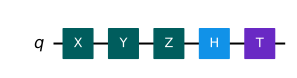

In [65]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.y(0)
circuit.z(0)
circuit.h(0)
circuit.t(0)
circuit.draw()

The operations are applied sequentially, starting on the left and ending on the right in the figure.
Let us first initialize a starting quantum state vector $v$ and then evolve that state according to the sequence of operations.

In [66]:
v = Statevector([1, 0])
v = v.evolve(circuit)
v.draw()

<IPython.core.display.Latex object>

Finally, let's simulate the result of running this experiment (i.e. preparing the state $|0\rangle$, applying the operations, and measuring) 4000 times.

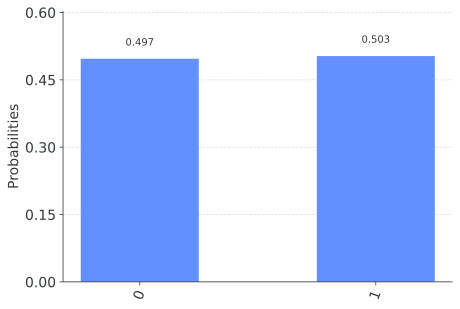

In [68]:
statistics = v.sample_counts(4000)

from qiskit.visualization import plot_histogram
plot_histogram(statistics)

#### Unitary operations on larger systems

In later lessons we'll see many examples of unitary operations on systems with more than two classical states.
The following matrix shows an example of a unitary operation on a system having three classical states:

$$
  A = 
  \begin{pmatrix}
    \class{_u00}{0} & \class{_u10}{0} & \class{_u20}{1} \\
    \class{_u01}{1} & \class{_u11}{0} & \class{_u21}{0} \\
    \class{_u02}{0} & \class{_u12}{1} & \class{_u22}{0}
  \end{pmatrix}.
$$

Assuming that the classical states of the system are 0, 1, and 2, we can describe this operation as addition modulo 3:

$$
  A \vert 0\rangle = \vert 1\rangle,
  \quad
  A \vert 1\rangle = \vert 2\rangle,
  \quad\text{and}\quad
  A \vert 2\rangle = \vert 0\rangle.
$$

The matrix $A$ is an example of a *permutation matrix*, which is a matrix in which every row has exactly one 1, every column has exactly one 1, and every other entry is 0.
Every permutation matrix, in any positive integer dimension, is unitary.
These are the only examples of matrices that represent both classical and quantum operations: a matrix is both stochastic and unitary if and only if it's a permutation matrix.

Another example of a unitary matrix, this time being a $4\times 4$ matrix, is this one:

$$
  U = 
  \frac{1}{2}
  \begin{pmatrix}
    1 &  1 &  1 &  1 \\
    1 &  i & -1 & -i \\
    1 & -1 &  1 & -1 \\
    1 & -i & -1 &  i
  \end{pmatrix}.
$$

This matrix describes an operation known as the *quantum Fourier transform*, specifically in the $4\times 4$ case.
The quantum Fourier transform can be defined more generally, for any positive integer dimension $n$, and will be discussed in much greater detail in a later lesson.

<!-- ::: q-block.exercise -->

### Exercise

Using Qiskit or the widget above, find a sequence of gates represented by the unitary operation
$\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ -1 & 1 \end{pmatrix}$

<!-- ::: -->